In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from pycbc import frame
from pycbc.types.timeseries import TimeSeries
import lal

In [3]:
path_CE_median_bbh = "/mnt/d/project_data/psd_3g/data/CE/bbh_median_CE_norotation_6h/confusion_noise_CE_1_BBH_21600s.gwf"
path_CE_median_nsbh = "/mnt/d/project_data/psd_3g/data/CE/nsbh_median_CE_norotation_6h/confusion_noise_CE_1_NSBH_21600s.gwf"
path_CE_median_bns = "/mnt/d/project_data/psd_3g/data/CE/bns_median_CE_norotation_6h/confusion_noise_CE_1_BNS_21600s.gwf"
path_CE_det_noise = "/mnt/d/project_data/psd_3g/data/CE/CE_6h/det_noise_CE_21600s.gwf"

In [4]:
start = 0
end = 3600

confusion_noise_bbh = frame.read_frame(location=path_CE_median_bbh, channels='H1:LDAS-STRAIN', start_time=start, end_time=end)
confusion_noise_nsbh = frame.read_frame(location=path_CE_median_nsbh, channels='H1:LDAS-STRAIN', start_time=start, end_time=end)
confusion_noise_bns = frame.read_frame(location=path_CE_median_bns, channels='H1:LDAS-STRAIN', start_time=start, end_time=end)
det_noise = frame.read_frame(location=path_CE_det_noise, channels='H1:LDAS-STRAIN', start_time=start, end_time=end)
total_strain = det_noise.data + confusion_noise_bbh.data + confusion_noise_nsbh.data + confusion_noise_bns.data

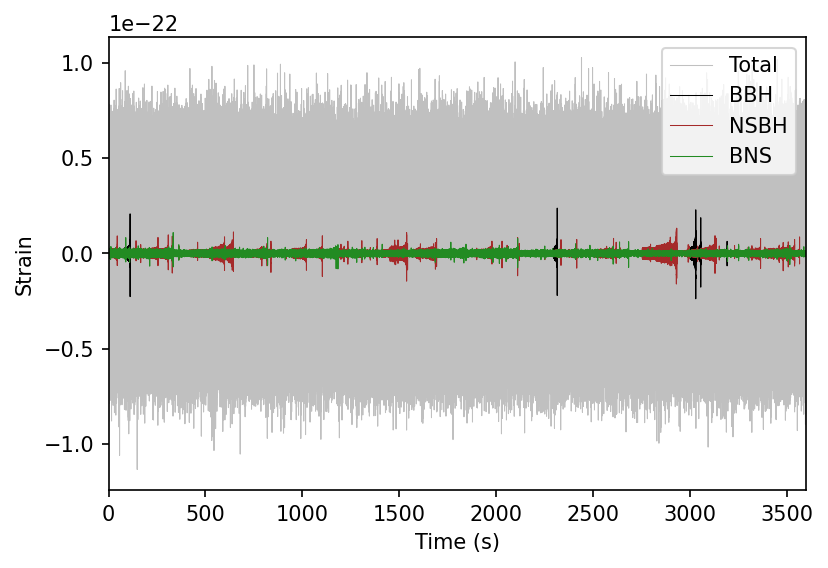

In [3]:
plt.figure(dpi=150)
plt.plot(det_noise.sample_times, total_strain, color="silver", label='Total', linewidth=0.5)
plt.plot(confusion_noise_bbh.sample_times, confusion_noise_bbh.data, color="black", label='BBH', linewidth=0.5)
plt.plot(confusion_noise_nsbh.sample_times, confusion_noise_nsbh.data, color="brown", label='NSBH', linewidth=0.5)
plt.plot(confusion_noise_bns.sample_times, confusion_noise_bns.data, color="forestgreen", label='BNS', linewidth=0.5)

plt.xlim(det_noise.sample_times[0], det_noise.sample_times[-1])
plt.xlabel("Time (s)")
plt.ylabel("Strain")
plt.legend(loc='upper right')
plt.savefig('strain_median_CE.pdf', dpi=500)
plt.show()

In [5]:
t_center = 3000
width = 250
epoch = lal.LIGOTimeGPS(det_noise.sample_times[0])
total_strain_slice = TimeSeries(total_strain, delta_t=1.0/4096, epoch=epoch).time_slice(t_center-width, t_center+width)

t, f, p = total_strain_slice.whiten(4, 4).qtransform(.001, logfsteps=100, qrange=(8, 8), frange=(5, 1024))

/tmp/ipykernel_4425/349558884.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, p**0.5, vmin=1, vmax=6)


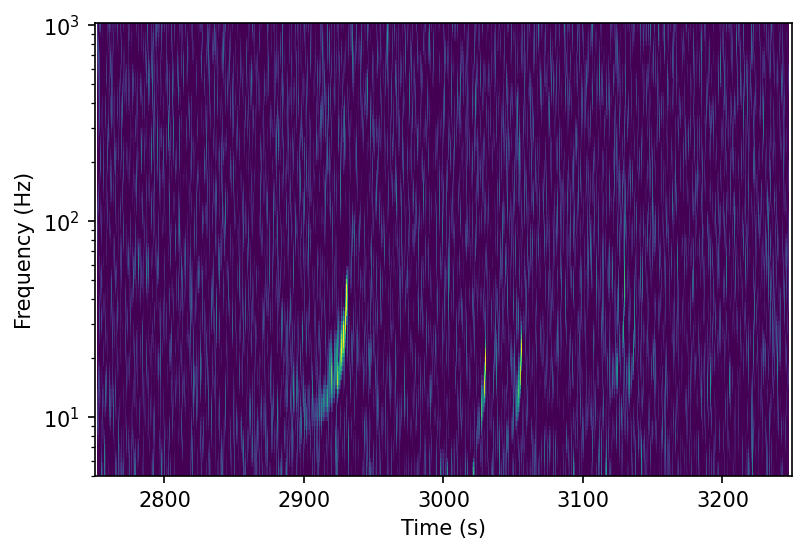

In [6]:
plt.figure(dpi=150)

plt.pcolormesh(t, f, p**0.5, vmin=1, vmax=6)
plt.yscale('log')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.xlim(t_center-width, t_center+width)
plt.ylim(5, 1024)
plt.show()